# Group Project

## By: Grace Napolitan, Lily Phanthavong, Jonathan Martinez-Carrada, Molly Grothem

## Introduction and Background

We are exploring how students habits affect their final grade in their classes. Specifically, we are seeing how their attendance, study time, their activities outside of school, and free time they have affect their final grade in their courses. Also, we have multiple data sets from different locations: India, Portugal, and Malaysia, which provides diversity of differing education systems. It will allow us to have a better understanding on how students' habits impact their performance in school and their final grade. It is interesting how splitting up student's time can truly impact their grade, for better or worse. Our analysis is relevant because student's should care and pay attention to how their habits impact their grades because that dictates their education, which is very important in life and can be to their futures. This analysis can bring attention to students' habits, positive or negative, and encourage students' to alter their habits or continue to live them normally. 

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

In [6]:
file_location = '~/Data-Science-Group-Student-Life-/student_lifestyle.csv'
DF = pd.read_csv(file_location,na_filter=False)

In [7]:
DF

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [8]:
DF.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [9]:
DF.value_counts()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  GPA   Stress_Level
1984        6.2                  1.2                            9.7                  5.0                   1.9                              3.06  Moderate        1
1983        6.3                  2.4                            8.1                  0.9                   6.3                              3.07  Moderate        1
1982        5.8                  0.8                            9.9                  0.9                   6.6                              2.71  Low             1
1981        7.5                  2.6                            7.5                  3.0                   3.4                              3.02  Moderate        1
1980        8.2                  2.2                            5.3                  4.5                   3.8                              3.43  High            1
                     

In [10]:
DF.shape

(2000, 8)

In [11]:
DF.keys()

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [12]:
file_location = '~/Data-Science-Group-Student-Life-/student_por.csv'
DF2 = pd.read_csv(file_location,na_filter=False)

In [13]:
DF2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [14]:
DF2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
DF2.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
MS      M    20   R        GT3      T        1     1     other     other     course      other     2           1          1         no         yes     no    no          yes      no      yes       yes       4       4         3      2     4     4       12        8   11  10    1
GP      F    15   R        GT3      T        1     1     at_home   other     home        mother    2           4          0         yes        yes     yes   yes         yes      yes     yes       no        3       1         2      1     1     1       4         13  13  13    1
                                                         other     other     course      mother    3           1          1         no         no      no    yes         yes  

In [16]:
DF2.shape

(649, 33)

In [17]:
DF2.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Data Used

This data set, Student Performance, is from UC Irvine Machine Learning Repository. It was complied by using school reports and questionaires in two Portuguese schoools. It displays student's performance in Mathmematics in secondary education.

In [18]:
file_location = '~/Data-Science-Group-Student-Life-/student_mat.csv'
DF3 = pd.read_csv(file_location,na_filter=False)

In [19]:
DF3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [20]:
DF3.shape

(395, 33)

There are 395 observations and 33 variables.

In [26]:
DF3.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Lists all of the variables in the data set.

In [21]:
DF3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average final grade is 10.41 out of 20. The average amount of absences is 5.71. The average for free time is 3.24 hours. The average for study time 2.04 hours.

In [25]:
habits = ['studytime','freetime','absences','activities','G3']
habits2 = DF3[habits].value_counts()
show(habits2)

Loading ITables v2.5.2 from the internet... (need help?)


This data frame displays the most important columns because it displays how students time was managed and their final grade together. The numberical data is the final grade (G3), free time, study time, and absences, since they are data expressed through numbers. The categorical data is if the student was in activities, since the data is expressed into categories of yes and no.

## Exploratory Data Analysis

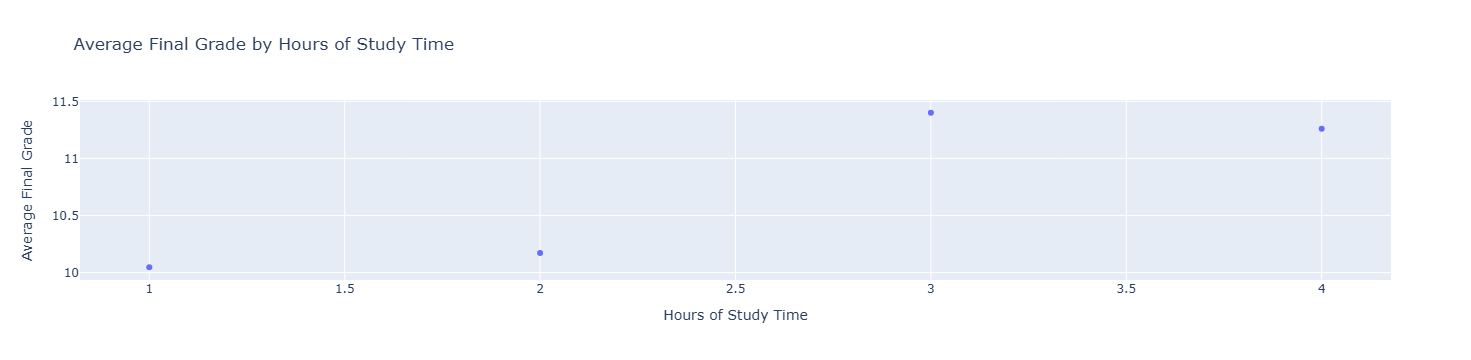

In [34]:
# averages final grade with respect to study time
new_DF3= DF3.groupby('studytime')['G3'].mean().reset_index()
# creates scatterplot of study time vs. final grade
fig = px.scatter(new_DF3,
                 x='studytime',
                 y='G3',
                 title='Average Final Grade by Hours of Study Time',
                 labels={'G3': 'Average Final Grade', 'studytime': 'Hours of Study Time'}
                  )   



fig.show()

The students who got 3-4 hours of study time had approximately 1 point higher on their final grade compared to those who got 1-2 hours of study time. Putting more effort and time into studying will help students understand the concept better, leading them to do better on tests, which would result in a higher final grade for the course.

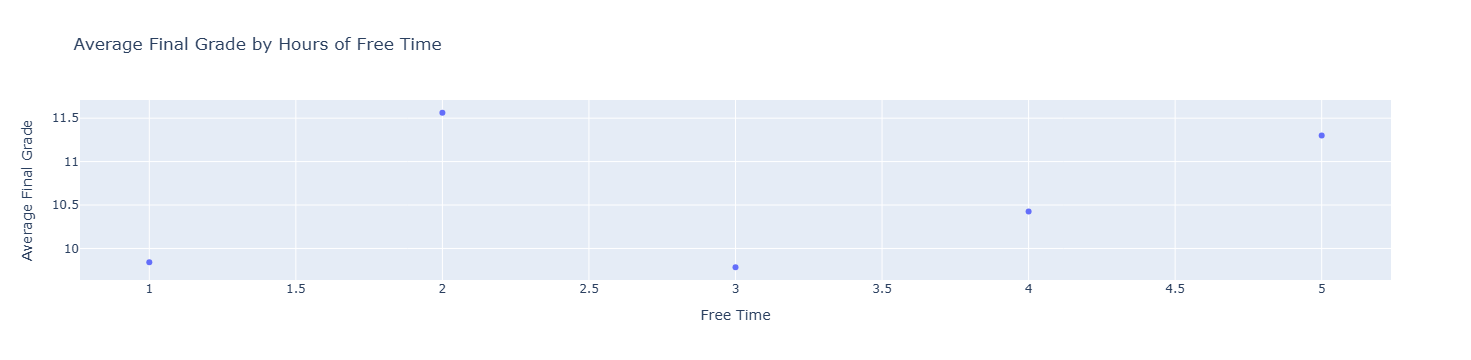

In [33]:
# averages final grade in respect to freetime
new1_DF3= DF3.groupby('freetime')['G3'].mean().reset_index()
# creates scatterplot for freetime vs. final grade
fig = px.scatter(new1_DF3,
                 x='freetime',
                 y='G3',
                 title='Average Final Grade by Hours of Free Time',
                 labels={'G3': 'Average Final Grade', 'freetime': 'Free Time'}
                  )   



fig.show()

There is not a pattern present in final grade vs. freetime, an increase in hours of free time does not correlate to the final grade raising or dropping consistently. This could be due to students having lots of free time and time for studying so they can maintain a higher grade or students with a low amount of free time having not a lot of studying time so they have a hard time maintaining a high grade. Just because a student has a lot of free time does not mean that they have lots of study time or a low final grade, which would be lots of people's assumption.

In [35]:
# linear model average final grade vs absences
new2_DF3= DF3.groupby('absences')['G3'].mean().reset_index()
X = DF3[['absences']].values.reshape(-1,1)
y=DF3['G3']

# do the regression
LM=LinearRegression()
LM.fit(X,y)

LinearRegression()

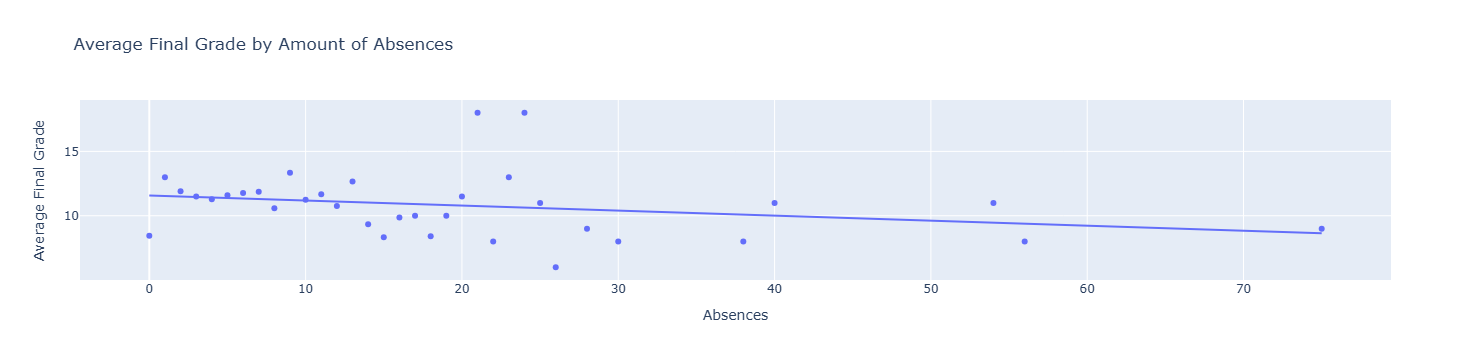

In [37]:
# averages final grade with respect to absences
new2_DF3= DF3.groupby('absences')['G3'].mean().reset_index()
# creates scatterplot of absences vs. final grade with the linear regression line
fig = px.scatter(new2_DF3,
                 x='absences',
                 y='G3',
                 trendline='ols',
                 title='Average Final Grade by Amount of Absences',
                 labels={'G3': 'Average Final Grade', 'absences': 'Absences'}
                  )   



fig.show()

Typically, the less absences a student has, the higher the final grade is. There are outliers, but it is clear the graph has a decline in final grade as the number of absences increase. This leads to the idea that since students have less absences, they are present to learn and absorb more information, leading them to perform better on tests, resulting in a higher final grade.

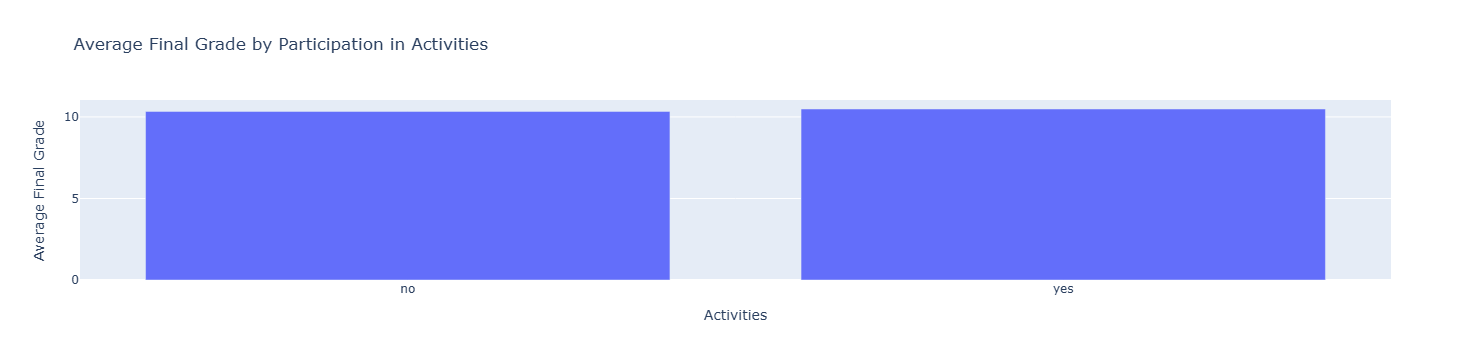

In [38]:
# averages final grade with respect to activities
new3_DF3= DF3.groupby('activities')['G3'].mean().reset_index()
# creates a bar graph with activities vs. final grade
fig = px.bar(new3_DF3,
                 x='activities',
                 y='G3',
                 title='Average Final Grade by Participation in Activities',
                 labels={'G3': 'Average Final Grade', 'activities': 'Activities'}
                  )   



fig.show()

Only a 0.14 difference in final grade between people who do and do not participate in activities, with people in in activities having the higher average final grade. Whether they particpate in activites does not impact their final grade much, which could be due to students still having time to study even though they are in activities. And, the activities could be helping their education.